In [86]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import calendar
import numpy as np

#Returns the month from input string
def returnMonth(string):
    try:
        return calendar.month_name[datetime.strptime((string), '%m/%d/%Y').month]
    except:
        return np.nan

#Returns the year from input string
def returnTime(string):
    try:
        string += "m"
        time = datetime.strptime((string), '%I%M%p')
        return str(time.strftime("%H"))
    except:
        return np.nan

In [85]:
#Read all parking ticket CSVs in
data2014 = pd.read_csv("Z:/BDA Datasets/ParkingTickets/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv", low_memory=False)
data2015 = pd.read_csv("Z:/BDA Datasets/ParkingTickets/Parking_Violations_Issued_-_Fiscal_Year_2015.csv", low_memory=False)
data2016 = pd.read_csv("Z:/BDA Datasets/ParkingTickets/Parking_Violations_Issued_-_Fiscal_Year_2016.csv", low_memory=False)
data2017 = pd.read_csv("Z:/BDA Datasets/ParkingTickets/Parking_Violations_Issued_-_Fiscal_Year_2017.csv", low_memory=False)

#Concatenate into one
arr = [data2014,data2015,data2016,data2017]
allData = pd.concat(arr)


D:\Users\Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [87]:
#Get Month and Time for each one from string
allData['OccMonth'] = allData['Issue Date'].apply(lambda x: returnMonth(x))
allData['OccTime'] = allData['Violation Time'].apply(lambda x: returnTime(str(x)))

#Preprocessing. Remove any rows that have na or empty Month and Time values
allData = allData.dropna(subset=['OccMonth'])
allData = allData[allData["OccMonth"] != ""]
allData = allData.dropna(subset=['OccTime'])
allData = allData[allData["OccTime"] != ""]

[Text(114.0, 0.5, 'Month of Year'),
 Text(0.5, 51.0, 'Time of Day'),
 Text(0.5, 1, 'Parking Violations Heatmap (Time of Day/Month of Year)')]

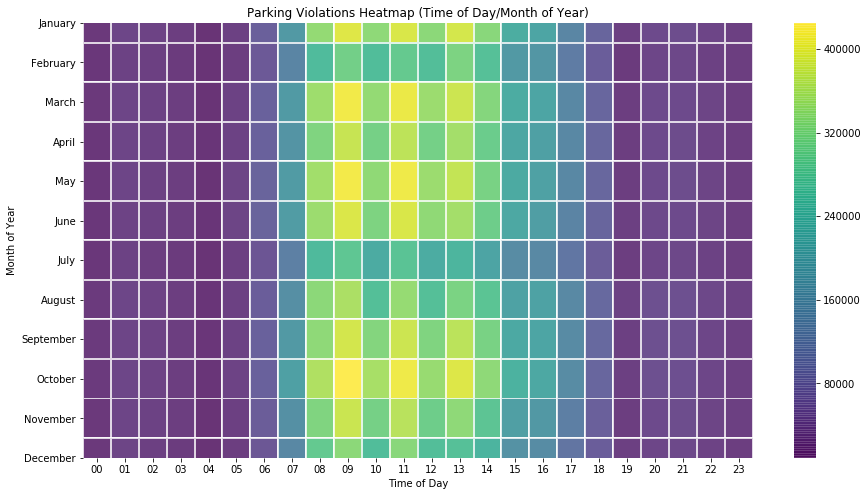

In [163]:
#setting up the plot
fig, ax = plt.subplots(figsize=(15,8))
kwargs = {'alpha':0.8,'linewidth':1, 'linestyle':'--',  "capstyle":'projecting'}
#used to make sure months columns are in correct order!
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#Put data into pivot table
pivot = allData.pivot_table(index='OccMonth',columns='OccTime',aggfunc='size',fill_value=0)
pivot = pivot.reindex(months)
#Create a heatmap
sns.heatmap(pivot,**kwargs, cmap='viridis', ax=ax)
#Show title/labels
ax.set(xlabel='Time of Day', ylabel='Month of Year',title='Parking Violations Heatmap (Time of Day/Month of Year)')


